In [1]:
from functions import *

In [2]:
files = [f for f in os.listdir(os.getcwd()) if '.nc' in f]

estac_seca = []

for file in files:
    mes = file[4:6]
    if (mes >= '06') & (mes <= '11'):
        estac_seca.append(file)
    else:
        pass

# Script para análise de dias com neblina 

In [3]:
# # Script para classificação dos dados de acordo com a média
# # da intensidade do sinal corrigido e normalizado

listaOK = []
listaERR = []

for file in estac_seca:

    ds = nc.Dataset(file)
    
    betaraw = ds['beta_raw'][:]
    
    signal_hour = []
    
    for signal in betaraw:
        signal_hour.append(signal.mean())

    aux1 = []
    means = []

    i = 1
    for data in signal_hour: 
        if i != 240:
            aux1.append(data)
            i+=1
        else:
            i = 1
            means.append(sum(aux1)/len(aux1))
            aux1 = []
    
    if len(means)==24 and min(means)>=0:
        listaOK.append(file)
    elif len(means)==24 and min(means)<0:
        listaERR.append(file)
    else:
        listaERR.append(file)

In [4]:
# # Script para classificação dos dados com e sem neblina

listaFOG = []
listaCLEAR = []

for fileOK in listaOK:
    
    ds = nc.Dataset(fileOK)
    
    xsec = np.array(ds['time'][:])
    t0 = datetime.datetime(1904,1,1,0,0,0)
    timearray = t0 + xsec * datetime.timedelta(seconds = 1)
    
    cbh = ds['cbh'][:]
    cbh = cbh.astype(float)
    cbh[ cbh<0 ] = np.nan
    
    fog_occurrence, N = fog(timearray, cbh)

    if fog_occurrence:
        listaFOG.append((fileOK, '{:.2f}'.format(N/240)))
    else:
        listaCLEAR.append((fileOK, '{:.2f}'.format(N/240)))

In [5]:
# # Script para criação dos histogramas
# # com neblina

cbh_total_fog = []
timearray_total_fog = []

for file in listaFOG:

    year = file[0][0:4] 
    month = file[0][4:6]
    day = file[0][6:8]
    
    ds = nc.Dataset(file[0])
    cbh = ds['cbh'][:]
    
    xsec = np.array(ds['time'][:])
    t0 = datetime.datetime(1904,1,1,0,0,0)
    timearray = t0 + xsec * datetime.timedelta(seconds = 1)
    
    for i, datas in enumerate(cbh):
        for data in datas:
            if data < 0:
                pass
            else:
                timearray_total_fog.append(timearray[i])
                cbh_total_fog.append(data)

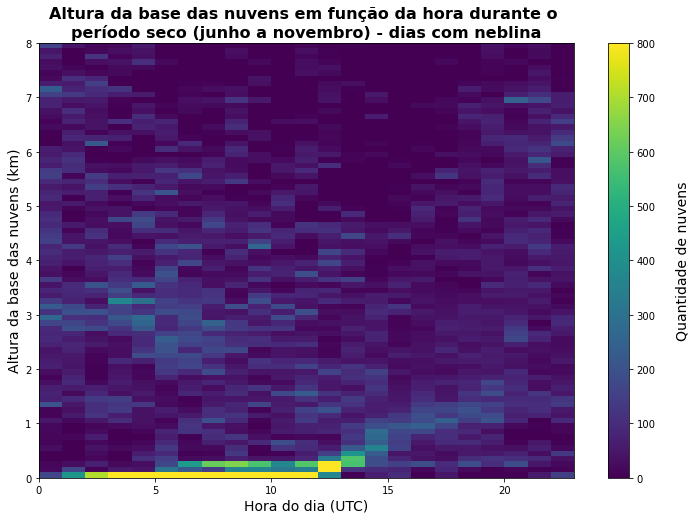

In [6]:
x_fog = []
x1_fog = []
y_fog = []
tempos_numericos_fog = []

for data in cbh_total_fog:
    y_fog.append(data/1000)

for i in timearray_total_fog:
    j = str(i)
    x1_fog.append(j[11:])

for tempo in x1_fog:
    tempo_real = converte_real(tempo)
    tempos_numericos_fog.append(tempo_real)

# x_ticks_lists = []

# for i in range(0, 48, 1):
#     if i == 0:
#         x_ticks_lists.append(i)
#     else:    
#         x_ticks_lists.append(i/2)


y_ticks_lists = []

for i in range(0, 81, 1):
    if i == 0:
        y_ticks_lists.append(i)
    else:
        y_ticks_lists.append(i/10)

plt.figure(figsize=(12, 8))
plt.hist2d(tempos_numericos_fog, y_fog, bins=[[i for i in range(24)], y_ticks_lists], cmap = 'viridis', vmin=0, vmax=800)
plt.title('Altura da base das nuvens em função da hora durante o \nperíodo seco (junho a novembro) - dias com neblina', fontweight = 'bold', fontsize=16)
plt.xlabel('Hora do dia (UTC)', fontsize=14)
plt.ylabel('Altura da base das nuvens (km)', fontsize=14)
plt.colorbar().set_label(label='\nQuantidade de nuvens', fontsize=14)

In [7]:
print('A quantidade de arquivos no período seco foi ', len(estac_seca))
print('A quantidade de arquivos removidos foi ', len(listaERR))
print('A quantidade de arquivos usados para montar o histograma foi ', len(listaFOG))

A quantidade de arquivos no período seco foi  158
A quantidade de arquivos removidos foi  105
A quantidade de arquivos usados para montar o histograma foi  24


In [8]:
abaixo_2_fog = []

for i, clouds in enumerate(cbh_total_fog):
    if (clouds <= 2000) & (clouds > 0):
        data_fog = str(timearray_total_fog[i])[11:]
        tempo_fog = converte_real(data_fog)
        abaixo_2_fog.append(tempo_fog)
        
abaixo_2_sorted_fog = sorted(abaixo_2_fog)

contagem_nuvens_fog = []
count = 0
i = 0

for tempo in abaixo_2_sorted_fog:
    if (tempo >= i) & (tempo < i + 1) & (i <= 23):
        count += 1
    else:
        i += 1
        x = count / (240*len(listaFOG))
        perc = float("%.2f"%x) * 100
        contagem_nuvens_fog.append(float("%.2f"%perc))
        count = 0

# Script para análise de dias sem neblina


In [9]:
# # Script para classificação dos dados de acordo com a média
# # da intensidade do sinal corrigido e normalizado

listaOK = []
listaERR = []

for file in estac_seca:

    ds = nc.Dataset(file)
    
    betaraw = ds['beta_raw'][:]
    
    signal_hour = []
    
    for signal in betaraw:
        signal_hour.append(signal.mean())

    aux1 = []
    means = []

    i = 1
    for data in signal_hour: 
        if i != 240:
            aux1.append(data)
            i+=1
        else:
            i = 1
            means.append(sum(aux1)/len(aux1))
            aux1 = []
    
    if len(means)==24 and min(means)>=0:
        listaOK.append(file)
    elif len(means)==24 and min(means)<0:
        listaERR.append(file)
    else:
        listaERR.append(file)

In [10]:
listaFOG = []
listaCLEAR = []

for fileOK in listaOK:
    
    ds = nc.Dataset(fileOK)
    
    xsec = np.array(ds['time'][:])
    t0 = datetime.datetime(1904,1,1,0,0,0)
    timearray = t0 + xsec * datetime.timedelta(seconds = 1)
    
    cbh = ds['cbh'][:]
    cbh = cbh.astype(float)
    cbh[ cbh<0 ] = np.nan
    
    fog_occurrence, N = fog(timearray, cbh)

    if fog_occurrence:
        listaFOG.append((fileOK, '{:.2f}'.format(N/240)))
    else:
        listaCLEAR.append((fileOK, '{:.2f}'.format(N/240)))

In [11]:
# # Script para criação dos histogramas
# # sem neblina

cbh_total = []
timearray_total = []

for file in listaCLEAR:

    year = file[0][0:4] 
    month = file[0][4:6]
    day = file[0][6:8]
    
    ds = nc.Dataset(file[0])
    cbh = ds['cbh'][:]
    
    xsec = np.array(ds['time'][:])
    t0 = datetime.datetime(1904,1,1,0,0,0)
    timearray = t0 + xsec * datetime.timedelta(seconds = 1)
    
    for i, datas in enumerate(cbh):
        for data in datas:
            if data < 0:
                pass
            else:
                timearray_total.append(timearray[i])
                cbh_total.append(data)

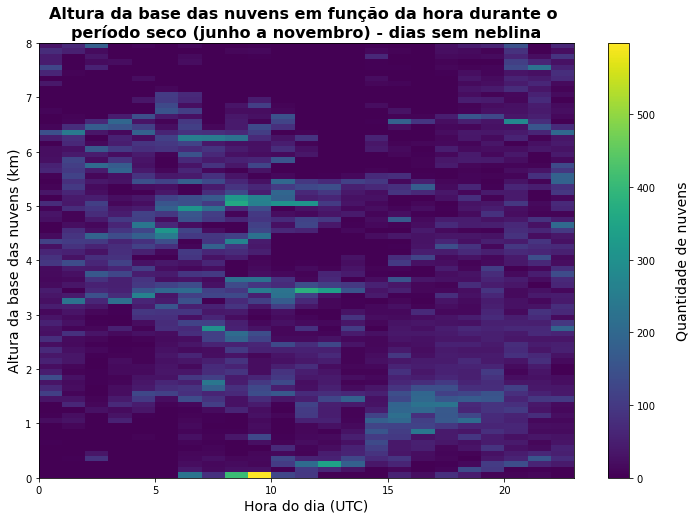

In [12]:
x = []
x1 = []
y = []
tempos_numericos = []

for data in cbh_total:
    y.append(data/1000)

for i in timearray_total:
    j = str(i)
    x1.append(j[11:])

for tempo in x1:
    tempo_real = converte_real(tempo)
    tempos_numericos.append(tempo_real)

# x_ticks_lists = []

# for i in range(0, 48, 1):
#     if i == 0:
#         x_ticks_lists.append(i)
#     else:    
#         x_ticks_lists.append(i/2)


y_ticks_lists = []

for i in range(0, 81, 1):
    if i == 0:
        y_ticks_lists.append(i)
    else:
        y_ticks_lists.append(i/10)

plt.figure(figsize=(12, 8))
plt.hist2d(tempos_numericos, y, bins=[[i for i in range(24)], y_ticks_lists], cmap = 'viridis')
plt.title('Altura da base das nuvens em função da hora durante o \nperíodo seco (junho a novembro) - dias sem neblina', fontweight = 'bold', fontsize=16)
plt.xlabel('Hora do dia (UTC)', fontsize=14)
plt.ylabel('Altura da base das nuvens (km)', fontsize=14)
plt.colorbar().set_label(label='\nQuantidade de nuvens', fontsize=14)

In [13]:
print('A quantidade de arquivos no período seco foi ', len(estac_seca))
print('A quantidade de arquivos removidos foi ', len(listaERR))
print('A quantidade de arquivos usados para montar o histograma foi ', len(listaCLEAR))

A quantidade de arquivos no período seco foi  158
A quantidade de arquivos removidos foi  105
A quantidade de arquivos usados para montar o histograma foi  29


In [14]:
abaixo_2 = []

for i, clouds in enumerate(cbh_total):
    if (clouds <= 2000) & (clouds > 0):
        data = str(timearray_total[i])[11:]
        tempo = converte_real(data)
        abaixo_2.append(tempo)
        
abaixo_2_sorted = sorted(abaixo_2)

contagem_nuvens = []
count = 0
i = 0

for tempo in abaixo_2_sorted:
    if (tempo >= i) & (tempo < i + 1) & (i <= 23):
        count += 1
    else:
        i += 1
        x = count / (240*len(listaCLEAR))
        perc = float("%.2f"%x) * 100
        contagem_nuvens.append(float("%.2f"%perc))
        count = 0

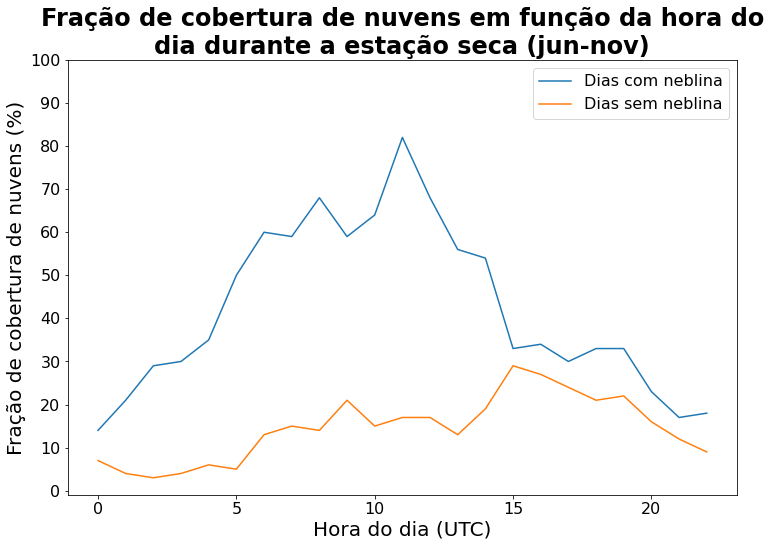

In [16]:
plt.figure(figsize=(12, 8))
plt.plot([i for i in range(23)], contagem_nuvens_fog, label='Dias com neblina')
plt.plot([i for i in range(23)], contagem_nuvens, label='Dias sem neblina')
plt.title('Fração de cobertura de nuvens em função da hora do\ndia durante a estação seca (jun-nov)', fontsize=24, fontweight='bold')
plt.xlabel('Hora do dia (UTC)', fontsize=20)
plt.ylabel('Fração de cobertura de nuvens (%)', fontsize=20)
plt.legend(fontsize=16)
plt.yticks(range(0, 101, 10), fontsize=16)
plt.xticks(fontsize=16)
plt.show()